COMPARING CONVOLUTIONAL NEURAL NETWORKS
This study is inspired from the article in Kaggle from Mohit Baliyan, which can be found at https://www.kaggle.com/code/mohitbaliyan/chest-x-ray-pneumonia-diagnosis-with-cnn/notebook, who presented different Convolutional Neural Networks architectures applied to a dataset of Chest X Ray images aiming to diagnose pneumonia.


In [1]:
# Importing libraries
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
# LINK TO DISCUSSION AND DATA: https://www.kaggle.com/code/mohitbaliyan/chest-x-ray-pneumonia-diagnosis-with-cnn/notebook
# Setting the relative URL on local machine to localize folder
# we use the new folder where validation folder has more elements taken from the test one
os.listdir(".../chest_xray")

['test', 'train', 'val']

In [2]:
# Specifying where the sets are on PC
train_dir = ".../chest_xray/train"
test_dir = ".../chest_xray/test"
val_dir = ".../chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir('.../chest_xray/train/PNEUMONIA'))
num_normal = len(os.listdir('.../chest_xray/train/NORMAL'))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir('.../chest_xray/test/PNEUMONIA'))}")
print(f"NORMAL={len(os.listdir('.../chest_xray/test/NORMAL'))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir('.../chest_xray/val/PNEUMONIA'))}")
print(f"NORMAL={len(os.listdir('.../chest_xray/val/NORMAL'))}")

Train set:
PNEUMONIA=3860
NORMAL=1336
Test set:
PNEUMONIA=260
NORMAL=160
Validation set:
PNEUMONIA=123
NORMAL=87


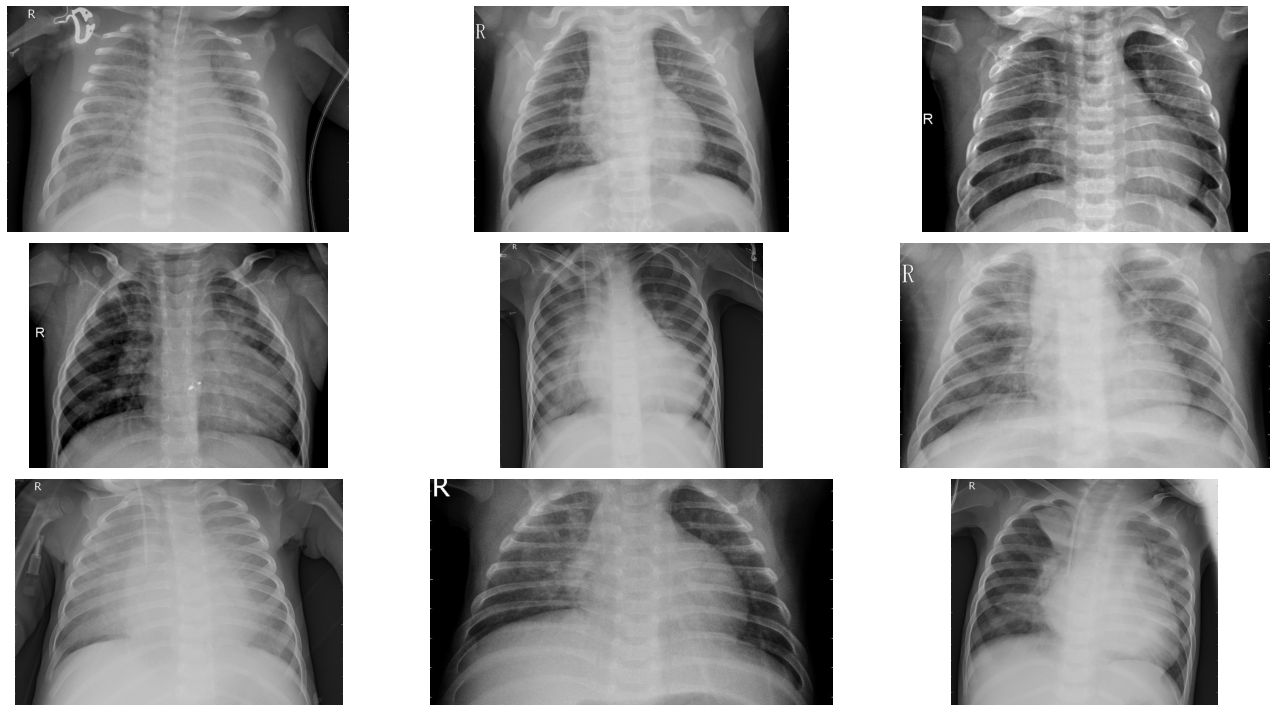

In [3]:
pneumonia = os.listdir(".../chest_xray/train/PNEUMONIA")
pneumonia_dir = ".../chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

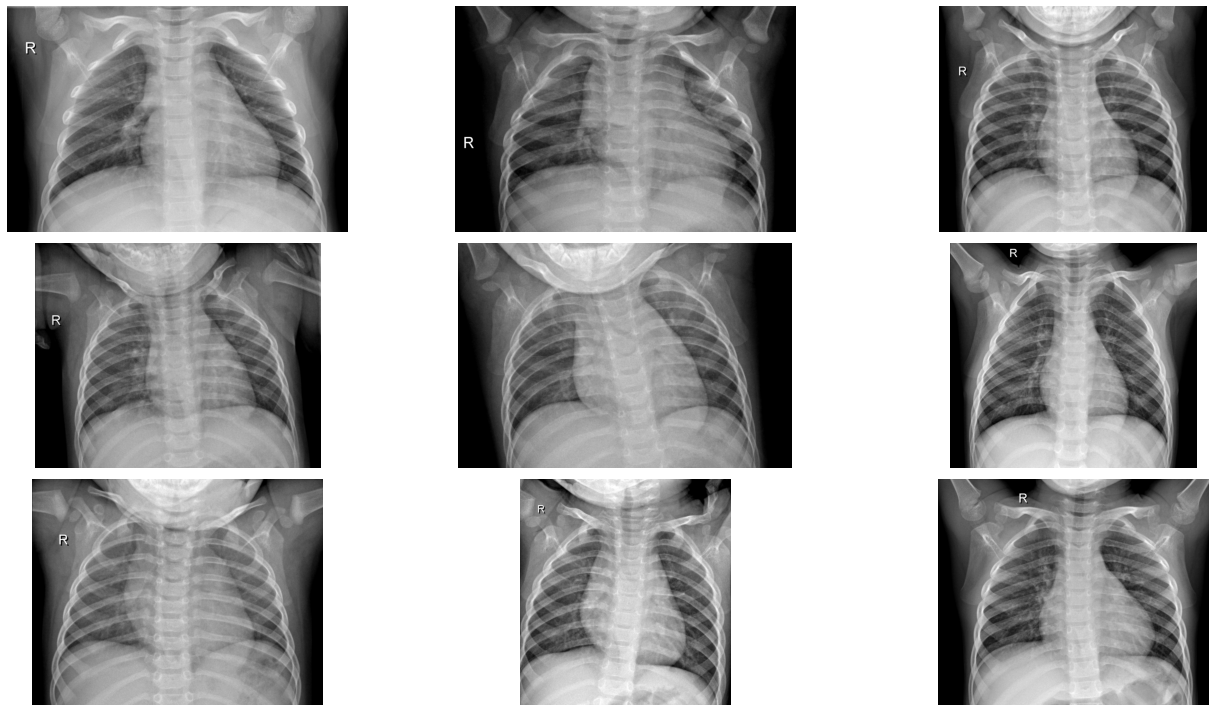

In [4]:
normal = os.listdir(".../chest_xray/train/NORMAL")
normal_dir = ".../chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

In [5]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5196 images belonging to 2 classes.
Found 210 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


LOSS FUNCTION
The loss function adopted is a weighted cross-entropy where weights have been calculated in order to avoid the bias toward the dominating class. This way, contibutions to the funcions are balanced.

In [6]:
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


Here begins CNNs initialization, training and fitting.
Command model.summary() can be used to show parameters values.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [8]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=50,
)

Epoch 1/10
100/100 [==============================] - 140s 1s/step - loss: 0.7402 - accuracy: 0.8300 - val_loss: 99.1410 - val_accuracy: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 125s 1s/step - loss: 0.5454 - accuracy: 0.8213 - val_loss: 4.9422 - val_accuracy: 0.4400
Epoch 3/10
100/100 [==============================] - 127s 1s/step - loss: 0.2419 - accuracy: 0.8263 - val_loss: 14.6293 - val_accuracy: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 139s 1s/step - loss: 0.1589 - accuracy: 0.8612 - val_loss: 7.1448 - val_accuracy: 0.1000
Epoch 5/10
100/100 [==============================] - 137s 1s/step - loss: 0.1432 - accuracy: 0.8900 - val_loss: 6.1569 - val_accuracy: 0.2600
Epoch 6/10
100/100 [==============================] - 154s 2s/step - loss: 0.1086 - accuracy: 0.8875 - val_loss: 1.6453 - val_accuracy: 0.4200
Epoch 7/10
100/100 [==============================] - 144s 1s/step - loss: 0.1084 - accuracy: 0.9125 - val_loss: 1.2965 - val_accura

In [9]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

420/420 [==============================] - 27s 65ms/step - loss: 0.9011 - accuracy: 0.7810
Test Accuracy: 78.10%
650/650 [==============================] - 290s 445ms/step - loss: 0.1840 - accuracy: 0.9405
Train Accuracy: 94.05%


Text(0.5, 1.0, 'Accuracy Evolution')

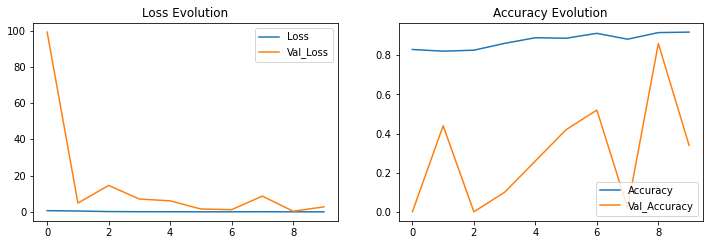

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [11]:
predSeq = model.predict(test, steps=len(test))
predSeqT = model.predict(train, steps=len(train))

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[ 79  81]
 [  7 253]]


,0,1,accuracy,macro avg,weighted avg
precision,0.918605,0.757485,0.790476,0.838045,0.818864
recall,0.493750,0.973077,0.790476,0.733413,0.790476
f1-score,0.642276,0.851852,0.790476,0.747064,0.772014
support,160.000000,260.000000,0.790476,420.000000,420.000000


In [13]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

In [14]:
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

dense_model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

dense_model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [15]:
r = dense_model.fit(
    train, 
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=100,
)

Epoch 1/10
100/100 [==============================] - 282s 3s/step - loss: 0.1439 - accuracy: 0.8537 - val_loss: 17.5554 - val_accuracy: 0.1300
Epoch 2/10
100/100 [==============================] - 270s 3s/step - loss: 0.1257 - accuracy: 0.8568 - val_loss: 1.9831 - val_accuracy: 0.8700
Epoch 3/10
100/100 [==============================] - 267s 3s/step - loss: 0.1037 - accuracy: 0.8925 - val_loss: 0.7287 - val_accuracy: 0.8700
Epoch 4/10
100/100 [==============================] - 279s 3s/step - loss: 0.1097 - accuracy: 0.8838 - val_loss: 1.7045 - val_accuracy: 0.4300
Epoch 5/10
100/100 [==============================] - 272s 3s/step - loss: 0.0955 - accuracy: 0.9062 - val_loss: 0.9016 - val_accuracy: 0.6600
Epoch 6/10
100/100 [==============================] - 278s 3s/step - loss: 0.1074 - accuracy: 0.8800 - val_loss: 0.8977 - val_accuracy: 0.8700
Epoch 7/10
100/100 [==============================] - 289s 3s/step - loss: 0.1071 - accuracy: 0.8788 - val_loss: 0.6872 - val_accuracy: 0.880

In [18]:
evaluation = dense_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = dense_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

420/420 [==============================] - 31s 73ms/step - loss: 0.9186 - accuracy: 0.7548
Test Accuracy: 75.48%
650/650 [==============================] - 287s 442ms/step - loss: 1.2751 - accuracy: 0.6515
Train Accuracy: 65.15%


Text(0.5, 1.0, 'Accuracy Evolution')

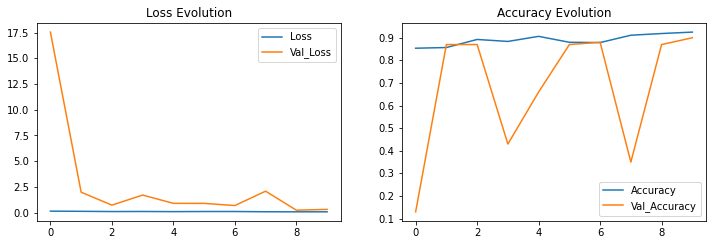

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [20]:
predDenseNet = dense_model.predict(test, steps=len(test))
predDenseNetT = dense_model.predict(train, steps=len(train))

In [21]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
# from keras.applications import VGG16
from keras.applications.vgg16 import VGG16

vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

In [22]:
vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [24]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=100)

Epoch 1/10
100/100 [==============================] - 349s 3s/step - loss: 0.2762 - accuracy: 0.6737 - precision: 0.8535 - recall: 0.6496 - val_loss: 2.2692 - val_accuracy: 0.8700 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 371s 4s/step - loss: 0.2318 - accuracy: 0.6947 - precision: 0.9069 - recall: 0.6507 - val_loss: 3.7133 - val_accuracy: 0.1300 - val_precision: 0.1300 - val_recall: 1.0000
Epoch 3/10
100/100 [==============================] - 385s 4s/step - loss: 0.1940 - accuracy: 0.7676 - precision: 0.9357 - recall: 0.7455 - val_loss: 0.8951 - val_accuracy: 0.5500 - val_precision: 0.1923 - val_recall: 0.7692
Epoch 4/10
100/100 [==============================] - 466s 5s/step - loss: 0.1864 - accuracy: 0.7775 - precision: 0.9403 - recall: 0.7541 - val_loss: 3.3404 - val_accuracy: 0.1300 - val_precision: 0.1300 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 495s 5s/step - loss: 0.1881 - accuracy

In [25]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

420/420 [==============================] - 75s 178ms/step - loss: 0.7030 - accuracy: 0.6190 - precision: 0.6190 - recall: 1.0000
Test Accuracy: 61.90%
650/650 [==============================] - 658s 1s/step - loss: 0.4571 - accuracy: 0.7438 - precision: 0.7436 - recall: 1.0000
Train Accuracy: 74.38%


Text(0.5, 1.0, 'Accuracy Evolution')

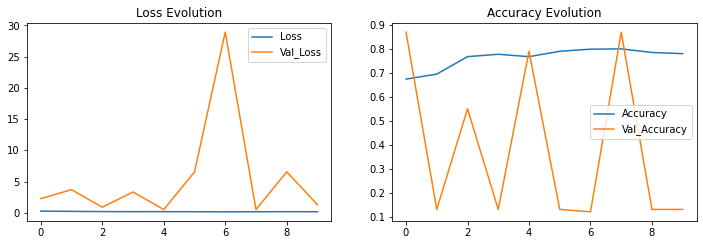

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [27]:
predVgg16 = vgg16_model.predict(test, steps=len(test))
predVgg16T = vgg16_model.predict(train, steps=len(train))

In [28]:
from tensorflow.keras.applications import ResNet50
resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

In [29]:
resnet_model = tf.keras.Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [30]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=100)

Epoch 1/10
100/100 [==============================] - 241s 2s/step - loss: 0.2735 - accuracy: 0.6319 - precision: 0.8525 - recall: 0.6128 - val_loss: 111675.5312 - val_accuracy: 0.1300 - val_precision: 0.1300 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 247s 2s/step - loss: 0.3024 - accuracy: 0.5850 - precision: 0.8036 - recall: 0.5960 - val_loss: 0.9176 - val_accuracy: 0.1300 - val_precision: 0.1300 - val_recall: 1.0000
Epoch 3/10
100/100 [==============================] - 248s 2s/step - loss: 0.2758 - accuracy: 0.6162 - precision: 0.8004 - recall: 0.6246 - val_loss: 10.3696 - val_accuracy: 0.1300 - val_precision: 0.1300 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 248s 2s/step - loss: 0.2040 - accuracy: 0.7500 - precision: 0.9082 - recall: 0.7536 - val_loss: 1.6571 - val_accuracy: 0.1300 - val_precision: 0.1300 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 327s 3s/step - loss: 0.2195 - accuracy: 

In [31]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

420/420 [==============================] - 39s 92ms/step - loss: 0.7357 - accuracy: 0.6167 - precision: 0.6210 - recall: 0.9769 10s - loss: 0.9402 - accura
Test Accuracy: 61.67%
650/650 [==============================] - 351s 540ms/step - loss: 0.4414 - accuracy: 0.8000 - precision: 0.7960 - recall: 0.9826
Train Accuracy: 80.00%


Text(0.5, 1.0, 'Accuracy Evolution')

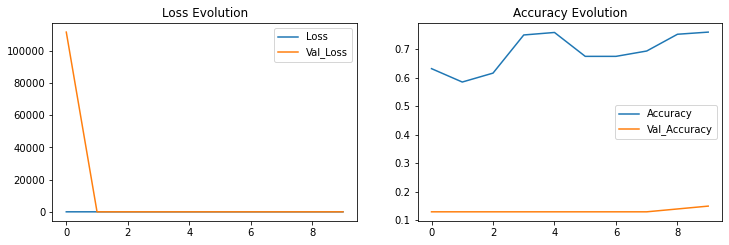

In [32]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [33]:
predResNet = resnet_model.predict(test, steps=len(test))
predResNetT = resnet_model.predict(train, steps=len(train))

In [34]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

In [35]:
inception_model = tf.keras.Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [36]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=100)

Epoch 1/10
100/100 [==============================] - 148s 1s/step - loss: 0.2507 - accuracy: 0.6712 - precision: 0.8825 - recall: 0.6437 - val_loss: 4.2048 - val_accuracy: 0.8500 - val_precision: 0.3333 - val_recall: 0.1538
Epoch 2/10
100/100 [==============================] - 152s 2s/step - loss: 0.2492 - accuracy: 0.6938 - precision: 0.8846 - recall: 0.6684 - val_loss: 20448.2812 - val_accuracy: 0.1300 - val_precision: 0.1300 - val_recall: 1.0000
Epoch 3/10
100/100 [==============================] - 156s 2s/step - loss: 0.2107 - accuracy: 0.7337 - precision: 0.9198 - recall: 0.7136 - val_loss: 189.5883 - val_accuracy: 0.8700 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 162s 2s/step - loss: 0.1779 - accuracy: 0.8125 - precision: 0.9317 - recall: 0.8000 - val_loss: 8.0022 - val_accuracy: 0.8700 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 164s 2s/step - loss: 0.1

In [37]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

420/420 [==============================] - 37s 87ms/step - loss: 19.0664 - accuracy: 0.3905 - precision: 0.7000 - recall: 0.0269
Test Accuracy: 39.05%
650/650 [==============================] - 365s 562ms/step - loss: 23.6055 - accuracy: 0.2708 - precision: 0.8198 - recall: 0.0236
Train Accuracy: 27.08%


Text(0.5, 1.0, 'Accuracy Evolution')

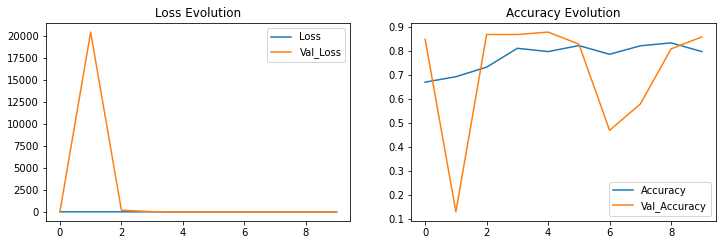

In [38]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [39]:
predInceptionNet = inception_model.predict(test, steps=len(test))
predInceptionNetT = inception_model.predict(train, steps=len(train))

In [40]:
predSeqV = model.predict(validation, steps=len(validation))
predDenseNetV = dense_model.predict(validation, steps=len(validation))
predVgg16V = vgg16_model.predict(validation, steps=len(validation))
predResNetV = resnet_model.predict(validation, steps=len(validation))
predInceptionNetV = inception_model.predict(validation, steps=len(validation))

In [41]:
# HERE BEGINS THE STATISTICAL ANALYSIS PART
train.class_indices
test.class_indices
validation.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [42]:
# function to compute all

correctResultsVal = list(validation.classes)
correctResultsTest = list(test.classes)
correctResultsTrain = list(train.classes)

def precisionCalculator(setVals, correctVals):
    setLen = len(setVals)
    correctPneu = 0
    totalPredictedPneu = 0
    for i in range(0, setLen):
        if setVals[i] == 1: # pneumonia predicted
            totalPredictedPneu += 1
            if correctVals[i] == 1:
                correctPneu += 1
    return correctPneu / totalPredictedPneu

def recallCalculator(setVals, correctVals):
    correctPneu = 0
    totalTruePneu = 0
    for i in range(0, len(setVals)):
        if correctVals[i] == 1:
            totalTruePneu += 1
        if setVals[i] == correctVals[i] and setVals[i] == 1:
            correctPneu += 1
    return correctPneu / totalTruePneu

def fscoreCalculator(classPrec, classRecall):
    return 2 * (classPrec * classRecall) / (classPrec + classRecall)

def accuracyEvaluator(predictedProbs,prob):
    valLen = len(predictedProbs)
    predictedValues = []
    sum = 0
    for i in range(0,valLen):
        if predictedProbs[i] >= prob:
            predictedValues.append(1)
        else:
            predictedValues.append(0)
    for i in range(0,valLen):
        if correctResultsVal[i] == predictedValues[i]:
            sum += 1
    acc = sum / len(predictedProbs) # accuracy
    return acc

def compute(cnnVal, cnnTest, correctSet): # cnn refers to the vector of predictions of validation and test dataset, respectively
    
    testLen = len(cnnTest)
    maxAcc = 0
    optProb = 0

    for i in range(0,100):
        prob = i/100
        accuracy = accuracyEvaluator(cnnVal, prob)
        if accuracy > maxAcc:
            maxAcc = accuracy
            optProb = prob
    
    testPredictions = []
    
    for i in range(0,testLen):
        if cnnTest[i] > optProb:
            testPredictions.append(1)
        else:
            testPredictions.append(0)
    
    defaultPredictions = []
    for i in range(0,testLen):
        if cnnTest[i] > 0.5:
            defaultPredictions.append(1)
        else:
            defaultPredictions.append(0)
    
    scores = []
    acc = 0

    for i in range(0,testLen):
        if correctSet[i] == testPredictions[i]:
            scores.append(1)
            acc += 1
        else:
            scores.append(0)

    acc = acc / testLen

    scoresDefault = []
    defaultAcc = 0

    for i in range(0,testLen):
        if correctSet[i] == defaultPredictions[i]:
            scoresDefault.append(1)
            defaultAcc += 1
        else:
            scoresDefault.append(0)

    defaultAcc = defaultAcc / testLen

    prec = precisionCalculator(testPredictions,correctSet)
    recall = recallCalculator(testPredictions,correctSet)
    f = fscoreCalculator(prec,recall)
    
    precDefault = precisionCalculator(defaultPredictions,correctSet)
    recallDefault = recallCalculator(defaultPredictions,correctSet)
    fDefault = fscoreCalculator(precDefault,recallDefault)

    maxAcc = round(maxAcc,2)
    acc = round(acc,2)
    defaultAcc = round(defaultAcc,2)
    prec = round(prec,2)
    recall = round(recall,2)
    f = round(f,2)
    fDefault = round(fDefault,2)

    return maxAcc, optProb, acc, defaultAcc, prec, recall, f, fDefault, scores, scoresDefault


In [43]:
s1, s2, s3, s4, s5, s6, s7, s8, s9, s0 = compute(predSeqV, predSeq, correctResultsTest)
d1, d2, d3, d4, d5, d6, d7, d8, d9, d0 = compute(predDenseNetV, predDenseNet, correctResultsTest)
v1, v2, v3, v4, v5, v6, v7, v8, v9, v0 = compute(predVgg16V, predVgg16, correctResultsTest)
r1, r2, r3, r4, r5, r6, r7, r8, r9, r0 = compute(predResNetV, predResNet, correctResultsTest)
i1, i2, i3, i4, i5, i6, i7, i8, i9, i0 = compute(predInceptionNetV, predInceptionNet, correctResultsTest)

s1T, s2T, s3T, s4T, s5T, s6T, s7T, s8T, s9T, s0T = compute(predSeqV, predSeqT, correctResultsTrain)
d1T, d2T, d3T, d4T, d5T, d6T, d7T, d8T, d9T, d0T = compute(predDenseNetV, predDenseNetT, correctResultsTrain)
v1T, v2T, v3T, v4T, v5T, v6T, v7T, v8T, v9T, v0T = compute(predVgg16V, predVgg16T, correctResultsTrain)
r1T, r2T, r3T, r4T, r5T, r6T, r7T, r8T, r9T, r0T = compute(predResNetV, predResNetT, correctResultsTrain)
i1T, i2T, i3T, i4T, i5T, i6T, i7T, i8T, i9T, i0T = compute(predInceptionNetV, predInceptionNetT, correctResultsTrain)

In [44]:
print("======== RESULTS FOR TEST ========")
print("Sequential Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(s1, s2, s3, s4, s5, s6, s7, s8))
print("--------")
print("DenseNet Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(d1, d2, d3, d4, d5, d6, d7, d8))
print("--------")
print("Vgg16 Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(v1, v2, v3, v4, v5, v6, v7, v8))
print("--------")
print("ResNet Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(r1, r2, r3, r4, r5, r6, r7, r8))
print("--------")
print("InceptionNet Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(i1, i2, i3, i4, i5, i6, i7, i8))
print("======== RESULTS FOR TRAIN ========")
print("Sequential Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(s1T, s2T, s3T, s4T, s5T, s6T, s7T, s8T))
print("--------")
print("DenseNet Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(d1T, d2T, d3T, d4T, d5T, d6T, d7T, d8T))
print("--------")
print("Vgg16 Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(v1T, v2T, v3T, v4T, v5T, v6T, v7T, v8T))
print("--------")
print("ResNet Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(r1T, r2T, r3T, r4T, r5T, r6T, r7T, r8T))
print("--------")
print("InceptionNet Results")
print("Val Acc:{}, Cutoff Prob:{}, Cutoff Acc:{}, 0.5 Acc:{}, Prec:{}, Rec:{}, FS:{}, Default FS:{}".format(i1T, i2T, i3T, i4T, i5T, i6T, i7T, i8T))

======== RESULTS FOR TEST ========
Sequential Results
Val Acc:0.83, Cutoff Prob:0.89, Cutoff Acc:0.82, 0.5 Acc:0.78, Prec:0.82, Rec:0.91, FS:0.86, Default FS:0.84
--------
DenseNet Results
Val Acc:0.81, Cutoff Prob:0.07, Cutoff Acc:0.79, 0.5 Acc:0.74, Prec:0.84, Rec:0.82, FS:0.83, Default FS:0.75
--------
Vgg16 Results
Val Acc:0.84, Cutoff Prob:0.82, Cutoff Acc:0.72, 0.5 Acc:0.62, Prec:0.77, Rec:0.78, FS:0.78, Default FS:0.76
--------
ResNet Results
Val Acc:0.7, Cutoff Prob:0.8, Cutoff Acc:0.64, 0.5 Acc:0.61, Prec:0.67, Rec:0.83, FS:0.74, Default FS:0.76
--------
InceptionNet Results
Val Acc:0.59, Cutoff Prob:0.0, Cutoff Acc:0.64, 0.5 Acc:0.4, Prec:0.64, Rec:0.96, FS:0.77, Default FS:0.07
======== RESULTS FOR TRAIN ========
Sequential Results
Val Acc:0.83, Cutoff Prob:0.89, Cutoff Acc:0.57, 0.5 Acc:0.61, Prec:0.74, Rec:0.65, FS:0.69, Default FS:0.74
--------
DenseNet Results
Val Acc:0.81, Cutoff Prob:0.07, Cutoff Acc:0.53, 0.5 Acc:0.44, Prec:0.74, Rec:0.57, FS:0.64, Default FS:0.5
----

In [45]:
# Defining the paired test
import random

def pairedtest(n1,n2,n_iter):
    ndiff = 0
    for i in range(len(n1)):
        ndiff += n1[i] - n2[i]
    if ndiff < 0 :
        nbig = n2
        nsmall = n1
        ndiff = - ndiff
    else:
        nbig = n1
        nsmall = n2
    
    bcount = 0
    
    for j in range(n_iter):
        tdiff = 0
        for k in range(len(nbig)):
            a = random.uniform(0,1)
            if a < 0.5:
                tdiff += nsmall[i] - nbig[i]
            else:
                tdiff += nbig[i] - nsmall[i]
        if tdiff > ndiff:
            bcount += 1
    return bcount/n_iter

In [46]:

nof_iters = 10000

def pairedtest(n1, n2, nof_iters):
    import random
    ndiff = 0
    for i in range(len(n1)):
        currDiff = n1[i] - n2[i]
        ndiff += currDiff
    #ndiff = sum([ n1[i]-n2[i] for i in range(len(n1)) ])
    if ndiff < 0:
         nbig = n2
         nsmall = n1
         ndiff = -ndiff
    else:
         nbig = n1
         nsmall = n2
    
    bcount = 0
    for niter in range(nof_iters):
        tdiff = 0
        for i in range(len(nbig)):
            a = random.random()
            if a <0.5:
                tdiff += nsmall[i]-nbig[i]
            else:
                tdiff += nbig[i]-nsmall[i]
        if tdiff > ndiff:
            bcount += 1
    return bcount / nof_iters

n1 = [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

n2 = [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

for i in range(10):
    print(pairedtest(n1,n2, 10000))

0.366
0.3684
0.3694
0.3605
0.3711
0.358
0.3626
0.3716
0.3644
0.3607


In [47]:
# Applying the paired test and saving results to compute the confidence intervals
[sScores,dScores,vScores,rScores,iScores] = [s9,d9,v9,r9,i9]
cnn = [sScores,dScores,vScores,rScores,iScores]
cnnNames = ['SeqScores','DenseScores','VggScores','ResScores','InceptionNetScores']
differences = [] # here we will save the difference values to compute confidence intervals
fileNames = [] # this will be useful when computing various confidence intervals

for i in range(0,len(cnn)-1):
   for j in range(i+1,len(cnn)):
    a = cnn[i]
    b = cnn[j]
    aName = cnnNames[i]
    bName = cnnNames[j]
    print('-'*40)
    currentComparison = aName + "_vs_" + bName
    print(currentComparison)
    fileName = currentComparison + ".vals" # here is the file where we are going to save the values
    fileNames.append(fileName)
    fileToSave = open(fileName, 'w')
    for k in range(10): 
        print(pairedtest(a , b, 10000)) # showing paired test results
    currDifferences = [] # list of current comparison differences
    if (len(a) == len(b)):
        print("Proceed...")
    else:
        print("Error...")
    for el in range(0,len(a)):
        if a[el] == b[el]: # if both methods provide the correct result or the wrong result: (1,1) or (0,0)
            currDifferences.append(0)
            fileToSave.write("0 ")
        elif a[el] > b[el]: # first method is correct, second one is wrong: (1,0)
            currDifferences.append(1)
            fileToSave.write("1 ")
        else: # first method is wrong, second one is correct: (0,1)
            currDifferences.append(-1)
            fileToSave.write("-1 ")
    # currDifferences now contains the differences for all images of the current comparison
    fileToSave.close()
    differences.append(currDifferences)

----------------------------------------
SeqScores_vs_DenseScores
0.0697
0.0725
0.0693
0.0699
0.067
0.0745
0.0719
0.0701
0.0711
0.0744
Proceed...
----------------------------------------
SeqScores_vs_VggScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
SeqScores_vs_ResScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
SeqScores_vs_InceptionNetScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
DenseScores_vs_VggScores
0.0017
0.0016
0.0019
0.0015
0.0025
0.0019
0.0019
0.0022
0.002
0.0018
Proceed...
----------------------------------------
DenseScores_vs_ResScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
DenseScores_vs_InceptionNetScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
VggScores_vs_ResScores
0.0009
0.0002
0.0001
0.0006
0.0006
0.0005
0.000

In [48]:

print(pairedtest(dScores,iScores,10000))

0.0


In [49]:
#!/usr/bin/python

######################################
# Mean Confidence Interval
# From: Statistics is Easy! By Dennis Shasha and Manda Wilson
# 
# Uses shuffling & bootstrapping to get a 90% confidence interval for the mean.
# 
# Author: Manda Wilson
#
# Example of FASTA formatted input file: 
# >slides
# 60.2 63.1 58.4 58.9 61.2 67.0 61.0 59.7 58.2 59.8
#
# Included in the code, but NOT in the pseudocode,
# is the bias-corrected confidence interval.  
# See the chapter titled "Bias Corrected Confidence Intervals" in Statistics is Easy!
# for more information on bias-corrected cofidence intervals.
#
# Pseudocode:
#
# 1. Measure the mean.  The mean is computed by by sum(grp) / len(grp).  
#    In this example the difference between the two group means is 12.97.
#
# 2. Do the following 10,000 times:
#    a. Create a new array of the same size as the original sample
#    b. Fill the array with randomly picked values from the original sample (randomly picked with replacement)
#    b. Measure the mean, just as we did in step (1) with the original sample.
#
# 3. Sort the means computed in step (2).
# 
# 4. Compute the size of each interval tail.  If we want a 90% confidence interval, then 1 - 0.9 yields the
#    portion of the interval in the tails.  We divide this by 2 to get the size of each tail, in this case 0.05.
#
# 5. Compute the upper and lower bounds.  To get the lower bound we multiply the tail size by the number of 
#    bootstraps we ran and round this value up to the nearest integer (to make sure this value maps
#    to an actual boostrap we ran).  In this case we multiple 0.05 by 10,000 and get 500, which rounds up to 500.
#    
#    To compute the upper bound we subtract the tail size from 1 and then multiply that by the number of bootstraps
#    we ran.  Round the result of the last step down to the nearest integer.  Again, this is to ensure this value
#    maps to an actual bootstrap we ran.  We round the lower bound up and the upper bound down to reduce the
#    confidence interval size, so that we can still say we have as much confidence in this result.
#
# 6. The bootstrap values at the lower bound and upper bound give us our confidence interval.
#
###################################### 


import random
import math
import sys

######################################
#
# Subroutines
#
######################################

# maps proportion of values above mean
# to number of standard deviations above mean
# keys will be index / 100 \:[0-9]\.[0-9][0-9]\,
area_to_sd_map = [0.0000, 0.0040, 0.0080, 0.0120, 0.0160, 0.0199, 0.0239, 0.0279, 0.0319, 0.0359, 0.0398, 0.0438, 0.0478, 0.0517, 0.0557, 0.0596, 0.0636, 0.0675, 0.0714, 0.0753, 0.0793, 0.0832, 0.0871, 0.0910, 0.0948, 0.0987, 0.1026, 0.1064, 0.1103, 0.1141, 0.1179, 0.1217, 0.1255, 0.1293, 0.1331, 0.1368, 0.1406, 0.1443, 0.1480, 0.1517, 0.1554, 0.1591, 0.1628, 0.1664, 0.1700, 0.1736, 0.1772, 0.1808, 0.1844, 0.1879, 0.1915, 0.1950, 0.1985, 0.2019, 0.2054, 0.2088, 0.2123, 0.2157, 0.2190, 0.2224, 0.2257, 0.2291, 0.2324, 0.2357, 0.2389, 0.2422, 0.2454, 0.2486, 0.2517, 0.2549, 0.2580, 0.2611, 0.2642, 0.2673, 0.2704, 0.2734, 0.2764, 0.2794, 0.2823, 0.2852, 0.2881, 0.2910, 0.2939, 0.2967, 0.2995, 0.3023, 0.3051, 0.3078, 0.3106, 0.3133, 0.3159, 0.3186, 0.3212, 0.3238, 0.3264, 0.3289, 0.3315, 0.3340, 0.3365, 0.3389, 0.3413, 0.3438, 0.3461, 0.3485, 0.3508, 0.3531, 0.3554, 0.3577, 0.3599, 0.3621, 0.3643, 0.3665, 0.3686, 0.3708, 0.3729, 0.3749, 0.3770, 0.3790, 0.3810, 0.3830, 0.3849, 0.3869, 0.3888, 0.3907, 0.3925, 0.3944, 0.3962, 0.3980, 0.3997, 0.4015, 0.4032, 0.4049, 0.4066, 0.4082, 0.4099, 0.4115, 0.4131, 0.4147, 0.4162, 0.4177, 0.4192, 0.4207, 0.4222, 0.4236, 0.4251, 0.4265, 0.4279, 0.4292, 0.4306, 0.4319, 0.4332, 0.4345, 0.4357, 0.4370, 0.4382, 0.4394, 0.4406, 0.4418, 0.4429, 0.4441, 0.4452, 0.4463, 0.4474, 0.4484, 0.4495, 0.4505, 0.4515, 0.4525, 0.4535, 0.4545, 0.4554, 0.4564, 0.4573, 0.4582, 0.4591, 0.4599, 0.4608, 0.4616, 0.4625, 0.4633, 0.4641, 0.4649, 0.4656, 0.4664, 0.4671, 0.4678, 0.4686, 0.4693, 0.4699, 0.4706, 0.4713, 0.4719, 0.4726, 0.4732, 0.4738, 0.4744, 0.4750, 0.4756, 0.4761, 0.4767, 0.4772, 0.4778, 0.4783, 0.4788, 0.4793, 0.4798, 0.4803, 0.4808, 0.4812, 0.4817, 0.4821, 0.4826, 0.4830, 0.4834, 0.4838, 0.4842, 0.4846, 0.4850, 0.4854, 0.4857, 0.4861, 0.4864, 0.4868, 0.4871, 0.4875, 0.4878, 0.4881, 0.4884, 0.4887, 0.4890, 0.4893, 0.4896, 0.4898, 0.4901, 0.4904, 0.4906, 0.4909, 0.4911, 0.4913, 0.4916, 0.4918, 0.4920, 0.4922, 0.4925, 0.4927, 0.4929, 0.4931, 0.4932, 0.4934, 0.4936, 0.4938, 0.4940, 0.4941, 0.4943, 0.4945, 0.4946, 0.4948, 0.4949, 0.4951, 0.4952, 0.4953, 0.4955, 0.4956, 0.4957, 0.4959, 0.4960, 0.4961, 0.4962, 0.4963, 0.4964, 0.4965, 0.4966, 0.4967, 0.4968, 0.4969, 0.4970, 0.4971, 0.4972, 0.4973, 0.4974, 0.4974, 0.4975, 0.4976, 0.4977, 0.4977, 0.4978, 0.4979, 0.4979, 0.4980, 0.4981, 0.4981, 0.4982, 0.4982, 0.4983, 0.4984, 0.4984, 0.4985, 0.4985, 0.4986, 0.4986, 0.4987, 0.4987, 0.4987, 0.4988, 0.4988, 0.4989, 0.4989, 0.4989, 0.4990, 0.4990]

def sd_to_area(sd):
	sign = 1
	if sd < 0:
		sign = -1
	sd = math.fabs(sd)  # get the absolute value of sd
	index = int(sd * 100)
	if len(area_to_sd_map) <= index:
		return sign * area_to_sd_map[-1] # return last element in array
	if index == (sd * 100):
		return sign * area_to_sd_map[index]
	return sign * (area_to_sd_map[index] + area_to_sd_map[index + 1]) / 2

def area_to_sd(area):
	sign = 1
	if area < 0:
		sign = -1
	area = math.fabs(area)
	for a in range(len(area_to_sd_map)):
		if area == area_to_sd_map[a]:
			return sign * a / 100
		if 0 < a and area_to_sd_map[a - 1] < area and area < area_to_sd_map[a]:
			# our area is between this value and the previous
			# for simplicity, we will just take the sd half way between a - 1 and a
			return sign * (a - .5) / 100
	return sign * (len(area_to_sd_map) - 1) / 100

def bootstrap(x):
        samp_x = []
        for i in range(len(x)):
                samp_x.append(random.choice(x))
        return samp_x


# expects list containing one list
def mean(grp):
        return sum(grp) / float(len(grp))

######################################
#
# Computations
#
######################################

all_means = []
all_errors = []
def meanconf(input_file):

    conf_interval = 0.9

    sample = [] 

    # file must be in FASTA format
    infile=open(input_file)
    for line in infile:
            if not line.isspace() and not line.startswith('>'):
                # line must contain values for previous sample
                sample += map(float,line.split())
    infile.close()

    observed_mean = mean(sample)

    num_resamples = 10000   # number of times we will resample from our original samples
    num_below_observed = 0   # count the number of bootstrap values below the observed sample statistic
    out = []                # will store results of each time we resample

    for i in range(num_resamples):
    # get bootstrap sample
    # then compute mean
    # append mean to out
        boot_mean = mean(bootstrap(sample))
        if boot_mean < observed_mean:
            num_below_observed += 1
        out.append(boot_mean)

    out.sort()

    # standard confidence interval computations
    tails = (1 - conf_interval) / 2

    # in case our lower and upper bounds are not integers,
    # we decrease the range (the values we include in our interval),
    # so that we can keep the same level of confidence
    lower_bound = int(math.ceil(num_resamples * tails))
    upper_bound = int(math.floor(num_resamples * (1 - tails)))

    # bias-corrected confidence interval computations
    p = num_below_observed / float(num_resamples)	# proportion of bootstrap values below the observed value

    dist_from_center = p - .5	# if this is negative, the original is below the center, if positive, it is above
    z_0 = area_to_sd(dist_from_center)

    #now we want to find the proportion that should be between the mean and one of the tails
    tail_sds = area_to_sd(conf_interval / 2) 
    z_alpha_over_2 = 0 - tail_sds
    z_1_minus_alpha_over_2 = tail_sds

    # in case our lower and upper bounds are not integers,
    # we decrease the range (the values we include in our interval),
    # so that we can keep the same level of confidence
    bias_corr_lower_bound = int(math.ceil(num_resamples * (0.5 + sd_to_area(z_alpha_over_2 + (2 * z_0)))))
    bias_corr_upper_bound =  int(math.floor(num_resamples * (0.5 + sd_to_area(z_1_minus_alpha_over_2 + (2 * z_0)))))


    ######################################
    #
    # Output
    #
    ######################################

    # print observed value and then confidence interval
    print(input_file)
    print ("Observed mean: %.2f" % observed_mean)
    all_means.append(observed_mean)
    print ("We have", conf_interval * 100, "% confidence that the true mean ", end="")
    print ("is between: %.2f" % out[lower_bound], "and %.2f" % out[upper_bound])

    print ("***** Bias Corrected Confidence Interval *****")
    print ("We have", conf_interval * 100, "% confidence that the true mean ", end="")
    print ("is between: %.2f" % out[bias_corr_lower_bound], "and %.2f" % out[bias_corr_upper_bound])
    all_errors.append(round(out[bias_corr_upper_bound] - out[bias_corr_lower_bound],2))
#for el in fileNames:
#    meanconf(el)
for el in fileNames:
    meanconf(el)

SeqScores_vs_DenseScores.vals
Observed mean: 0.03
We have 90.0 % confidence that the true mean is between: -0.01 and 0.06
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: -0.01 and 0.06
SeqScores_vs_VggScores.vals
Observed mean: 0.10
We have 90.0 % confidence that the true mean is between: 0.06 and 0.14
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.06 and 0.14
SeqScores_vs_ResScores.vals
Observed mean: 0.18
We have 90.0 % confidence that the true mean is between: 0.14 and 0.22
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.14 and 0.22
SeqScores_vs_InceptionNetScores.vals
Observed mean: 0.18
We have 90.0 % confidence that the true mean is between: 0.14 and 0.22
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.13 and 0.22
DenseScores_vs_VggScores.vals
Observed 

In [50]:
#---SOURCES----#

# https://www.kaggle.com/code/mohitbaliyan/chest-x-ray-pneumonia-diagnosis-with-cnn/notebook
# http://cs.nyu.edu/cs/faculty/shasha/papers/MeanConf.py

# Author: Nicola Zucchia, Università degli Studi di Trieste
# Supervisor: Dennis Shasha, New York University

In [51]:
# HERE BEGINS THE PLOTTING PART

# Now let us plot results for distribution of means of difference and confidence intervals

In [52]:
all_final_results = {}
# retrieve final weights for each chick. The result is a dictionary where diet is the key and the value is a list with the final weights of the chicks who followed that diet.
for i in range(0,5): # we work with 5 neural network but sequential has both 0.5 and 0.7 critical probabilities
    all_final_results.update({cnnNames[i] : cnn[i]})

# must substitute with a "dictionary" where CNN is the key and the value is a list with the predicted class of the images in test directory

In [53]:
def shuffle(grps):
    num_grps = len(grps)
    pool = []

    # pool all values
    for i in range(num_grps):
        pool.extend(grps[i])
    # mix them up
    random.shuffle(pool)
    # reassign to groups of same size as original groups
    new_grps = []
    start_index = 0
    end_index = 0
    for i in range(num_grps):
        end_index = start_index + len(grps[i])
        new_grps.append(pool[start_index:end_index])
        start_index = end_index
    return new_grps

In [54]:
def meandiff(grpA, grpB):
    return (sum(grpB) / float(len(grpB))) - (sum(grpA) / float(len(grpA)))

In [55]:
def draw_hist(d, observed, cnn1, cnn2):
    plt.hist(d, bins = 100)
    plt.axvline(x=observed,color='r',linestyle ='dashed', linewidth=2)
    plt.show()

In [56]:
def diff2meansig(cnn1, cnn2, grpA, grpB):

    # list of lists
    samples = [grpA, grpB]
    a = 0
    b = 1

    observed_mean_diff = meandiff(samples[a], samples[b])
    all_mean_diffs = []

    count = 0
    num_shuffles = 10000

    for i in range(num_shuffles):
        new_samples = shuffle(samples)
        mean_diff = meandiff(new_samples[a], new_samples[b])
        all_mean_diffs.append(mean_diff)
        if mean_diff >= observed_mean_diff:
            count = count + 1
    
    draw_hist(all_mean_diffs, observed_mean_diff, cnn1, cnn2)

    ######################################
    #
    # Output
    #
    ######################################
    
    print("**********CNN: ", cnn1, " vs CNN: ", cnn2,"**********")

    print ("Observed difference of two means: %.2f" % observed_mean_diff)
    print (count, "out of", num_shuffles, "experiments had a difference of two means ", end="")
    print ("greater than or equal to", end=" ")
    print ("%.2f" % observed_mean_diff, ".")
    print ("The chance of getting a difference of two means", end=" ")
    print ("greater than or equal to ", end="")
    print ("%.2f" % observed_mean_diff, "is", (count / float(num_shuffles)), ".")

In [57]:
#random.seed(123) # this step is not necessary. 
                 # it simply guarantees to output the same results as in the book.

# DenseNet is the most accurate method: I compute the difference of the mean plot for DenseNet vs. other CNN
#combinations = [[0,1],[2,1],[3,1],[4,1]]               
#combinations = [[1,2], [1,3], [1,4], [1,5], [2,3], [2,4], [2,5], [3,4], [3,5], [4,5]] # must use each combination of two CNNs
'''
for combination in combinations:
    cnn1Name, cnn2Name = cnnNames[combination[0]], cnnNames[combination[1]]
    cnn1, cnn2 = cnn[combination[0]], cnn[combination[1]]
    diff2meansig(cnn2Name, cnn1Name, cnn2, cnn1)
'''

'\nfor combination in combinations:\n    cnn1Name, cnn2Name = cnnNames[combination[0]], cnnNames[combination[1]]\n    cnn1, cnn2 = cnn[combination[0]], cnn[combination[1]]\n    diff2meansig(cnn2Name, cnn1Name, cnn2, cnn1)\n'

In [58]:
print(all_errors)

[0.07, 0.08, 0.08, 0.09, 0.08, 0.09, 0.1, 0.08, 0.1, 0.08]


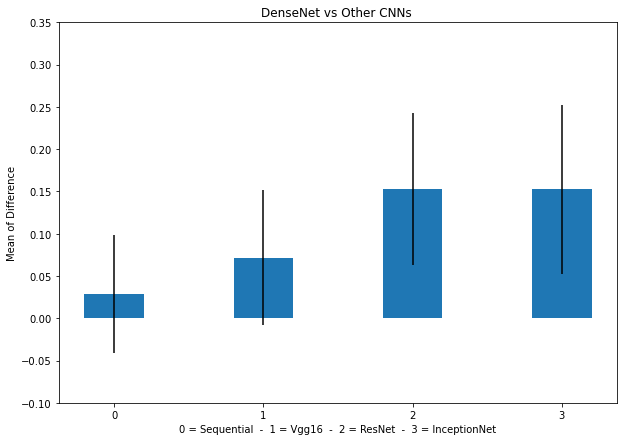

In [59]:
# New Plot
'''
feature_imp_data = {'features':X_train.columns,
                 'mean':result.importances_mean,
                 'sd':result.importances_std}
feature_imp_df = pd.DataFrame(data=feature_imp_data)

sns.set(font_scale=1)
variableplot, axes = plt.subplots(nrows = 1,ncols = 1,
                         figsize = (4,6), dpi=300, 
                         facecolor="white"
                        )
# add error bars - standard error.
feature_plot = sns.barplot(x='features',y='mean',data=feature_imp_df)
feature_plot.set(xlabel="Features",ylabel="Importance")
feature_plot.set_xticklabels(feature_imp_df['features'],rotation=90, fontsize="large")
variableplot.subplots_adjust(bottom=0.55, left=.2)
variableplot.savefig("important_variable.png")

scores = ['sScores','dScores','vScores','rScores','iScores']
plt.bar(x=scores,y=all_means,height=1)
plt.show()

# cambiare le medie con quelle riferite al CNN più accurato
data = {'sScores':all_means[0], 'vScores':all_means[4],
        'rScores':all_means[5],'iScores':all_means[6]}
cnns = list(data.keys())
means = list(data.values())
errors = np.array(all_errors)
fig = plt.figure(figsize = (10, 5))
ax = plt.subplot
# creating the bar plot
plt.bar(cnns, means,
        width = 0.4)#,yerr=errors)
plt.xlabel("CNNS")
plt.ylabel("Means")
plt.ylim(-0.1,0.3)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.title("Means and Confidence of DenseNet against other CNNs")
plt.show()
'''
N = 4
diffMeans = (all_means[0],all_means[4],all_means[5],all_means[6])
diffErrors = (all_errors[0],all_errors[4],all_errors[5],all_errors[6])
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, height= diffMeans, width=0.4, yerr = diffErrors)
plt.xlabel('0 = Sequential  -  1 = Vgg16  -  2 = ResNet  -  3 = InceptionNet') 
plt.ylabel('Mean of Difference')
plt.title('DenseNet vs Other CNNs ')
plt.xticks(ind, x=('0=Sequential', '1=Vgg16', '2=ResNet', '3=InceptionNet'))
plt.yticks(np.arange(-0.1, 0.4, 0.05))
 
plt.show()


([<matplotlib.axis.YTick at 0x1c476b8fb48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

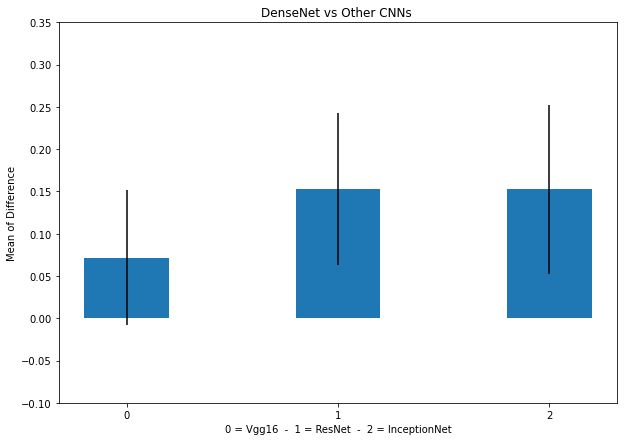

In [60]:
# DenseNet compared to all other CNNs gives a low p-value: we must plot

N = 3
diffMeans = (all_means[4],all_means[5],all_means[6])
diffErrors = (all_errors[4],all_errors[5],all_errors[6])
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, height= diffMeans, width=0.4, yerr = diffErrors)
plt.xlabel('0 = Vgg16  -  1 = ResNet  -  2 = InceptionNet') 
plt.ylabel('Mean of Difference')
plt.title('DenseNet vs Other CNNs ')
plt.xticks(ind, x=('0=Vgg16', '1=ResNet', '2=InceptionNet'))
plt.yticks(np.arange(-0.1, 0.4, 0.05))

In [61]:
# PROCEDURE WITH DEFAULT THRESOLD

defaultScores = [s0,d0,v0,r0,i0]
# cnnName is the same as above
defaultDifferences = []
defaultFileNames = []

for i in range(0,len(defaultScores)-1):
    for j in range(i+1,len(defaultScores)):
        a = defaultScores[i]
        b = defaultScores[j]
        aName = cnnNames[i]
        bName = cnnNames[j]
        print('-'*40)
        currentComparison = aName + "_vs_" + bName
        print(currentComparison)
        fileName = "default_" + currentComparison + ".vals" # here is the file where we are going to save the values
        defaultFileNames.append(fileName)
        fileToSave = open(fileName, 'w')
        for k in range(10): 
            print(pairedtest(a , b, 10000)) # showing paired test results
        currDifferences = [] # list of current comparison differences
        if (len(a) == len(b)):
            print("Proceed...")
        else:
            print("Error...")
        for el in range(0,len(a)):
            if a[el] == b[el]: # if both methods provide the correct result or the wrong result: (1,1) or (0,0)
                currDifferences.append(0)
                fileToSave.write("0 ")
            elif a[el] > b[el]: # first method is correct, second one is wrong: (1,0)
                currDifferences.append(1)
                fileToSave.write("1 ")
            else: # first method is wrong, second one is correct: (0,1)
                currDifferences.append(-1)
                fileToSave.write("-1 ")
        # currDifferences now contains the differences for all images of the current comparison
        fileToSave.close()
        defaultDifferences.append(currDifferences)


----------------------------------------
SeqScores_vs_DenseScores
0.083
0.0823
0.0809
0.0849
0.0805
0.082
0.0853
0.0856
0.0757
0.0893
Proceed...
----------------------------------------
SeqScores_vs_VggScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
SeqScores_vs_ResScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
SeqScores_vs_InceptionNetScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
DenseScores_vs_VggScores
0.0007
0.0004
0.0002
0.0002
0.0004
0.0003
0.0004
0.0002
0.0001
0.0003
Proceed...
----------------------------------------
DenseScores_vs_ResScores
0.0
0.0
0.0003
0.0004
0.0002
0.0
0.0001
0.0001
0.0001
0.0001
Proceed...
----------------------------------------
DenseScores_vs_InceptionNetScores
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Proceed...
----------------------------------------
VggScores_vs_ResScores
0.1307
0.1359
0.1402
0.133

In [62]:
for el in defaultFileNames:
    meanconf(el)

default_SeqScores_vs_DenseScores.vals
Observed mean: 0.04
We have 90.0 % confidence that the true mean is between: -0.01 and 0.09
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: -0.01 and 0.08
default_SeqScores_vs_VggScores.vals
Observed mean: 0.16
We have 90.0 % confidence that the true mean is between: 0.12 and 0.19
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.12 and 0.19
default_SeqScores_vs_ResScores.vals
Observed mean: 0.16
We have 90.0 % confidence that the true mean is between: 0.13 and 0.20
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.13 and 0.20
default_SeqScores_vs_InceptionNetScores.vals
Observed mean: 0.38
We have 90.0 % confidence that the true mean is between: 0.32 and 0.44
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.31 and 0.44
default

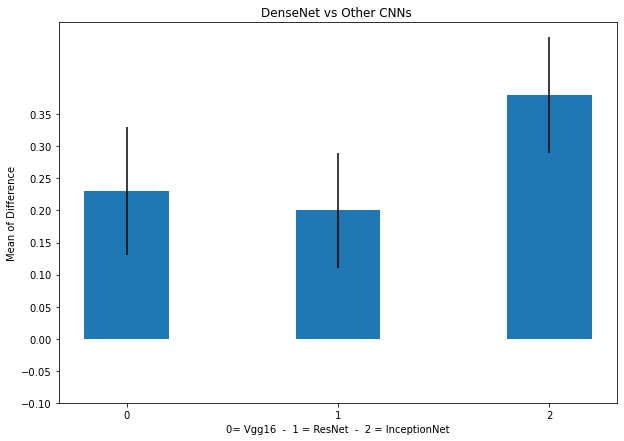

In [63]:
defaultN = 3
defaultDiffMeans = (0.23,0.20,0.38)
defaultDiffErrors = (0.10,0.09,0.09)
defaultInd = np.arange(defaultN)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(defaultInd, height= defaultDiffMeans, width=0.4, yerr = defaultDiffErrors)
plt.xlabel('0= Vgg16  -  1 = ResNet  -  2 = InceptionNet') 
plt.ylabel('Mean of Difference')
plt.title('DenseNet vs Other CNNs ')
plt.xticks(ind, x=('0=Vgg16', '1=ResNet', '2=InceptionNet'))
plt.yticks(np.arange(-0.1, 0.4, 0.05))
 
plt.show()

([<matplotlib.axis.YTick at 0x1c476cb90c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

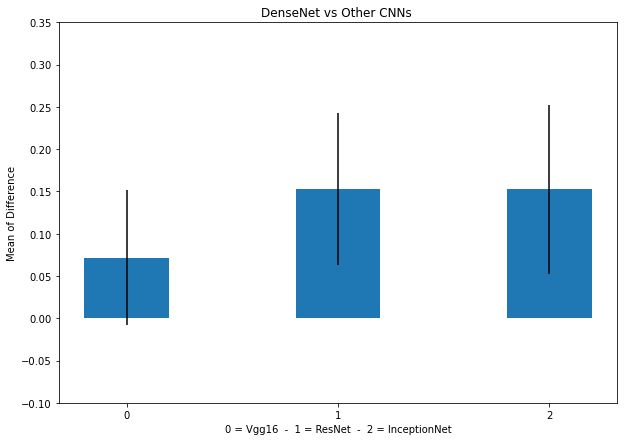

In [64]:
# The same using author's default 0.5 probability thresold

# first we need to do again everything 

diffMeans = (all_means[4],all_means[5],all_means[6])
diffErrors = (all_errors[4],all_errors[5],all_errors[6])
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, height= diffMeans, width=0.4, yerr = diffErrors)
plt.xlabel('0 = Vgg16  -  1 = ResNet  -  2 = InceptionNet') 
plt.ylabel('Mean of Difference')
plt.title('DenseNet vs Other CNNs ')
plt.xticks(ind, x=('0=Vgg16', '1=ResNet', '2=InceptionNet'))
plt.yticks(np.arange(-0.1, 0.4, 0.05))

In [65]:
# DESCRIPTION
# The plot displayed above compares DenseNet to other CNN architectures, having the former the best accuracy.
# The height of the bars represents the mean of the difference in accuracy and the segment line corresponds to the 90% confidence interval.
# Every other CNN was plotted as the p-value computed for each comparison results less than 1/10000.

In [66]:
# SINGLE METHODS MEAN AND CONFIDENCE INTERVAL
single_cnn_files = []
single_cnns_to_file = []
strNames = ['sScores','dScores','vScores','rScores','iScores']
scoresNames = [sScores,dScores,vScores,rScores,iScores]
for i in range(0,5):
    fName = strNames[i]
    cDiffs = []
    final_Name = fName + ".vals"
    single_cnns_to_file.append(final_Name)
    f = open(final_Name,'w')
    for el in scoresNames[i]:
        f.write('{} '.format(el))
        cDiffs.append(scoresNames[el])
    f.close()
    single_cnn_files.append(cDiffs)

In [67]:
for el in single_cnns_to_file:
    meanconf(el)

sScores.vals
Observed mean: 0.82
We have 90.0 % confidence that the true mean is between: 0.79 and 0.85
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.79 and 0.85
dScores.vals
Observed mean: 0.79
We have 90.0 % confidence that the true mean is between: 0.76 and 0.83
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.76 and 0.82
vScores.vals
Observed mean: 0.72
We have 90.0 % confidence that the true mean is between: 0.69 and 0.76
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.68 and 0.75
rScores.vals
Observed mean: 0.64
We have 90.0 % confidence that the true mean is between: 0.60 and 0.68
***** Bias Corrected Confidence Interval *****
We have 90.0 % confidence that the true mean is between: 0.60 and 0.68
iScores.vals
Observed mean: 0.64
We have 90.0 % confidence that the true mean is between: 0.60 and 0.68
***** Bi

([<matplotlib.axis.YTick at 0x1c476d78c48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

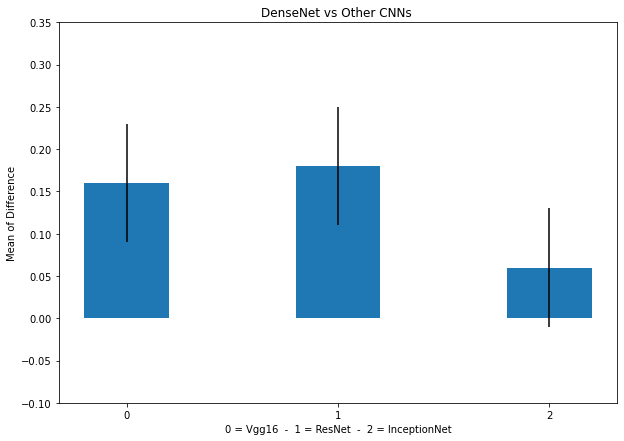

In [68]:
from matplotlib import pyplot as plt
import numpy as np
myMeans = (0.16,0.18,0.06)
myErrors = (0.07,0.07,0.07)
myInd = np.arange(3)  
myWidth = 0.35 
 
myFig = plt.subplots(figsize =(10, 7))
myP1 = plt.bar(myInd, height= myMeans, width=0.4, yerr = myErrors)
plt.xlabel('0 = Vgg16  -  1 = ResNet  -  2 = InceptionNet') 
plt.ylabel('Mean of Difference')
plt.title('DenseNet vs Other CNNs ')
plt.xticks(myInd, x=('0=Vgg16', '1=ResNet', '2=InceptionNet'))
plt.yticks(np.arange(-0.1, 0.4, 0.05))

In [69]:
# Trying to avoid overfitting for models where overfitting was suspected.
# Note: we suspect a model to be overfitting data if we see a rapid decrease in loss function for training set
# throughout epochs, whereas loss in validation set does not.
# In this case study, Vgg16 model looks like it is overfitting data, and also InceptionNet model displays
# a high loss during some epochs.
# (epoch = repetition of the process of fitting a model using training and fixing parameters with validation)


In [ ]:
# knowing that densenet gives statistically better results than other architectures, we try different 
# parameters combinations in order to find the optimal performing one

possible_epochs = [5, 10]
possible_steps_per_epoch = [50, 100, 200]
possible_validation_steps = [20, 50, 100]

possible_all = []

for i in possible_epochs:
    for j in possible_steps_per_epoch:
        for k in range(0,j-1):
            possible_r = dense_model.fit(
                train, 
                epochs=i,
                validation_data=validation,
                class_weight=class_weight,
                steps_per_epoch=j,
                validation_steps=k,
            )
            possible_preds = dense_model.predict(test, steps=len(test))
            possible_all.append(possible_preds)

In [75]:
# Trying meaningful solutions without running for a decade ...

modified_epochs = 20
modified_steps_per_epoch = 200
modified_validation_steps = 100

modified_r = dense_model.fit(
                train, 
                epochs=modified_epochs,
                validation_data=validation,
                class_weight=class_weight,
                steps_per_epoch=modified_steps_per_epoch,
                validation_steps=modified_validation_steps,
            )

modified_preds = dense_model.predict(test, steps=len(test))

Epoch 1/20
200/200 [==============================] - 554s 3s/step - loss: 0.1055 - accuracy: 0.8838 - val_loss: 0.3689 - val_accuracy: 0.8100
Epoch 2/20
200/200 [==============================] - 497s 2s/step - loss: 0.0632 - accuracy: 0.9344 - val_loss: 0.6193 - val_accuracy: 0.8100
Epoch 3/20
200/200 [==============================] - 487s 2s/step - loss: 0.0659 - accuracy: 0.9348 - val_loss: 1.6476 - val_accuracy: 0.6700
Epoch 4/20
200/200 [==============================] - 488s 2s/step - loss: 0.0617 - accuracy: 0.9325 - val_loss: 0.5660 - val_accuracy: 0.8700
Epoch 5/20
200/200 [==============================] - 485s 2s/step - loss: 0.0557 - accuracy: 0.9400 - val_loss: 1.1665 - val_accuracy: 0.3000
Epoch 6/20
200/200 [==============================] - 483s 2s/step - loss: 0.0637 - accuracy: 0.9300 - val_loss: 0.5524 - val_accuracy: 0.8600
Epoch 7/20
200/200 [==============================] - 487s 2s/step - loss: 0.0669 - accuracy: 0.9279 - val_loss: 1.1532 - val_accuracy: 0.6800

Text(0.5, 1.0, 'Accuracy Evolution')

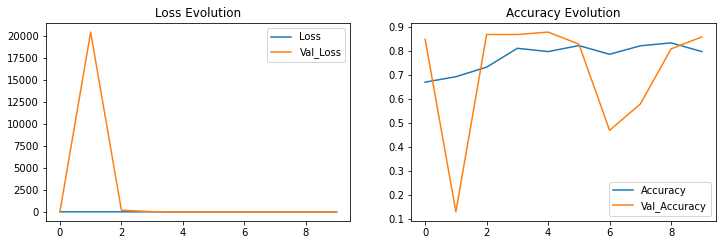

In [76]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [78]:
modified_predictions = dense_model.predict(test, steps=len(test))

In [80]:
modified_predictions_T = dense_model.predict(train, steps=len(train))
modified_predictions_V = dense_model.predict(validation, steps=len(validation))

In [83]:
m1, m2, m3, m4, m5, m6, m7, m8, m9, m0 = compute(modified_predictions_V, modified_predictions, correctResultsTest)

In [89]:
def opt_acc(predictions, correct_ones, prob):
    modified_vals = []

    for i in range(0, len(predictions)):
        if predictions[i] >= prob:
            modified_vals.append(1)
        else:
            modified_vals.append(0)

    modified_scores = []

    for i in range(0, len(modified_vals)):
        if modified_vals[i] == correct_ones[i]:
            modified_scores.append(1)
        else:
            modified_scores.append(0)

    modified_acc = sum(modified_scores)/len(modified_scores)
    return modified_acc

print(opt_acc(modified_preds, correctResultsTest, 0.5))

0.9047619047619048


In [96]:
# This is the proof that architectures has been upgraded

ps = []
mp = 0
while mp < 1:
    ps.append(mp)
    mp = mp + 0.01

m_acc = []

for p in ps:
    cur_mod_acc = opt_acc(modified_preds, correctResultsTest, p)
    m_acc.append(cur_mod_acc)

print(max(m_acc), ", 0.",m_acc.index(max(m_acc)))
    

0.9142857142857143 , 0. 58
